#### In the QUANDL/ NASDAQ portal, there were only 10 free data sources. I picked the "World Agricultural Supply and Demand Estimates" data source. The WASDE report comes from the World Agricultural Outlook Board (WAOB). The report is released monthly, and provides annual forecasts for U.S. and various world regions pertaining to wheat, rice, coarse grains, oilseeds, and cotton. The report also covers U.S. production of sugar, meat, poultry, eggs, and milk. I downloaded it as "CSV" and convert it to "Excel" to do some basic filtering and pivot tables to see the ratio of import/ export of wheat. 


#### I filtered specifically to European Union data because I have used Amsterdam Airbnb data in the past CF Exercises. I really like pastries and baked goods, so I filtered even more what is the import/export ratio of "wheat" crop. I am curious if it worth exploring the bakeries.

#### I import "EUR-WHEAT-EXPORTS" data here in Jupyter notebook to answer Exercise 6.6:
##### 4. Create a line chart of your data.
##### 5. Decompose the data’s components. Analyze the results from the plot in a markdown cell.

##### 6. Conduct a Dickey-Fuller test to check for stationarity. Interpret the results in a markdown cell and reference your null hypothesis. 
##### Null hypothesis: There is a unit root, meaning the data is not stationary.  Jumps in data suggest it is not stable over time.
##### Alternative hypothesis: There is no root unit and data is stable over time.

##### 7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.
##### 8. If your data still isn’t stationary, perform another round of differencing and repeat step 6.
##### 9. Check your data’s autocorrelations.

In [36]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os


# import the necessary functions
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [37]:
# make path variable
path = r'C:\Users\justi\Downloads\2024AirbnbAmsterdam'

In [38]:
# import "EUR-WHEAT-EXPORTS" dataset, ensure "index_col=0" removes the "Unnamed:0 index column", and address memory usage concerns with "low_memory= False"
df = pd.read_csv(os.path.join(path, 'EUR-WHEAT-EXPORTS.csv'), index_col = 0, low_memory= False)

In [39]:
# check for datatype
df.dtypes

period     object
value     float64
dtype: object

In [40]:
# check for top 5 line items in each column variable
df.head()

,period,value
YEAR,,
2024,Jan,36.5
2024,Feb,36.5
2024,Jan,36.5
2024,Sep,37.5
2024,Sep,37.5


In [41]:
# Check for missing values
df.isnull().sum()

period    0
value     0
dtype: int64

##### There are no missing values

In [42]:
# Check for mixed-type data
for col in df.columns.tolist():
  weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

##### There are no mixed datatypes

In [45]:
# Creating a pivot table to sum exports by year
pivot_table = df.pivot_table(values='value', index='YEAR', aggfunc='sum')

In [46]:
pivot_table

,value
YEAR,
2022,745.5
2023,669.5
2024,491.5


#### 4. Create a line chart of your data.

In [47]:
# Define the values for the DataFrame
data = {
    'YEAR': [2022, 2023, 2024],
    'value': [745.5, 669.5, 491.5]
}

# Create the DataFrame
subset_df = pd.DataFrame(data)

# Set 'YEAR' as the index
subset_df.set_index('YEAR', inplace=True)

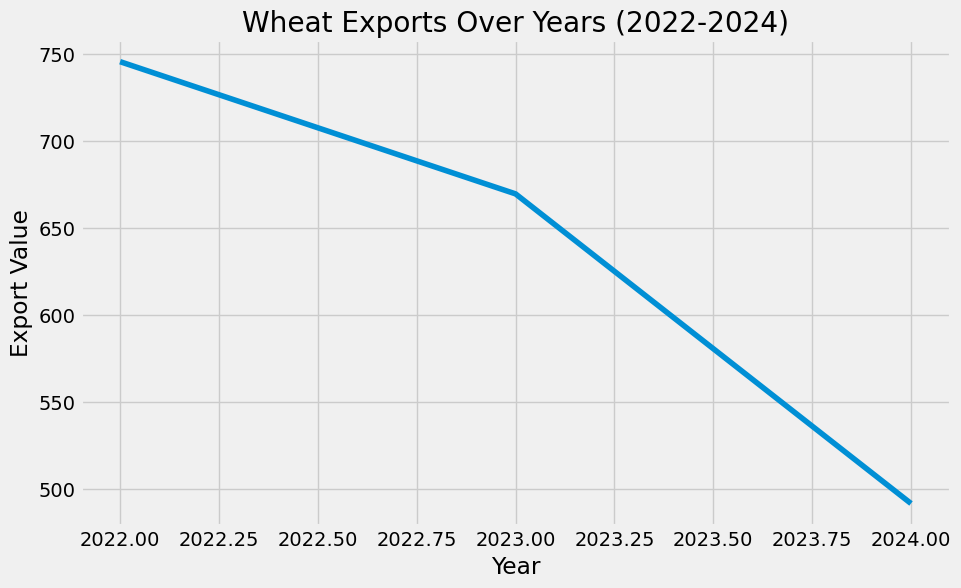

In [49]:
# Plot the subset data
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(subset_df.index, subset_df['value'])

# Add titles and labels
plt.title('Wheat Exports Over Years (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Export Value')

# Display the chart
plt.show()

#### 5. Decompose the data’s components. Analyze the results from the plot in a markdown cell.

In [50]:
# Reset the index to move 'YEAR' from index to a regular column
df_reset = df.reset_index()

# Now 'YEAR' will be a regular column
print(df_reset.head())

   YEAR period  value
0  2024    Jan   36.5
1  2024    Feb   36.5
2  2024    Jan   36.5
3  2024    Sep   37.5
4  2024    Sep   37.5


In [51]:
# Convert 'YEAR' and 'period' into a proper datetime index
df_reset['YEAR'] = pd.to_datetime(df_reset['YEAR'].astype(str) + df_reset['period'], format='%Y%b')

In [52]:
# Set the 'YEAR' column as index and sort
df_reset.set_index('YEAR', inplace=True)
df_reset.sort_index(inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_reset['value'], model='additive', period=12)

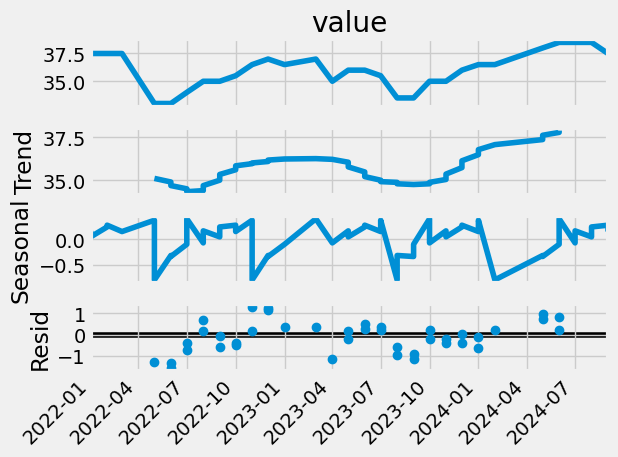

In [54]:
# Plot the decomposition
fig = decomposition.plot()

# Rotate the x-axis labels (years) by 45 degrees and adjust the layout
plt.gcf().autofmt_xdate(rotation=45)

# Adjust layout to ensure the labels fit properly
plt.tight_layout()

# Show the plot
plt.show()

##### Analysis: 
##### 1. Trend: Represents underlying wheat exports over time. It can be observed if wheat exports are increasing or decreasing over time.
##### 2. Seasonal: Represents recurring patterns that repeat at regular months. It highlights consistent fluctuations that may occur in year and month.
##### 3. Residual: Represents the noise/ irregularities that are not explained by trend (1) or seasonality (2) components. This could be anomalies or unexpected changes in the data.

#### 6. Conduct a Dickey-Fuller test to check for stationarity. Interpret the results in a markdown cell and reference your null hypothesis. 

In [56]:
# Import the adfuller() function to properly define Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

# Apply the test on the time series
dickey_fuller(df_reset['value'])

Dickey-Fuller Stationarity Test:
Test Statistic                 -1.956877
p-value                         0.305795
Number of Lags Used             0.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


#### Null hypothesis: There is a unit root, meaning the data is not stationary.  Jumps in data suggest it is not stable over time.
#### Alternative hypothesis: There is no root unit and data is stable over time.

##### Analysis:
##### Is this data jumping around a lot in a way I cannot predict? Dickey-Fuller test helps me answer that question. 
##### T-Statistic = -1.96. This is greater than Critical Values 1%, 5%, 10%. It is not smaller (more negative) to -3.6, -2.9, nor -2.6. Therefore data is not stationary.
##### P-value = 0.31. This is greater than 0.05, therefore we cannot reject null hypthesis. Data most likley has root unit and is not stationary.


##### 7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.
##### 8. If your data still isn’t stationary, perform another round of differencing and repeat step 6.

In [61]:
# Stationarize data by using the differencing technique
df_diff = df_reset['value'] - df_reset['value'].shift(1)

# Remove missing values as result of the differencing
df_diff.dropna(inplace=True)

In [63]:
df_diff

YEAR
2022-01-01    0.0
2022-02-01    0.0
2022-02-01    0.0
2022-03-01    0.0
2022-05-01   -4.5
2022-05-01    0.0
2022-06-01    0.0
2022-06-01    0.0
2022-07-01    1.0
2022-07-01    0.0
2022-08-01    1.0
2022-08-01    0.0
2022-09-01    0.0
2022-09-01    0.0
2022-10-01    0.5
2022-10-01    0.0
2022-11-01    1.0
2022-11-01    0.0
2022-12-01    0.5
2022-12-01    0.0
2023-01-01   -0.5
2023-03-01    0.5
2023-04-01   -2.0
2023-05-01    1.0
2023-05-01    0.0
2023-06-01    0.0
2023-06-01    0.0
2023-07-01   -0.5
2023-07-01    0.0
2023-08-01   -2.0
2023-08-01    0.0
2023-09-01    0.0
2023-09-01    0.0
2023-10-01    1.5
2023-10-01    0.0
2023-11-01    0.0
2023-11-01    0.0
2023-12-01    1.0
2023-12-01    0.0
2024-01-01    0.5
2024-01-01    0.0
2024-02-01    0.0
2024-05-01    1.5
2024-05-01    0.0
2024-06-01    0.5
2024-06-01    0.0
2024-07-01    0.0
2024-07-01    0.0
2024-08-01    0.0
2024-08-01    0.0
2024-09-01   -1.0
2024-09-01    0.0
Name: value, dtype: float64

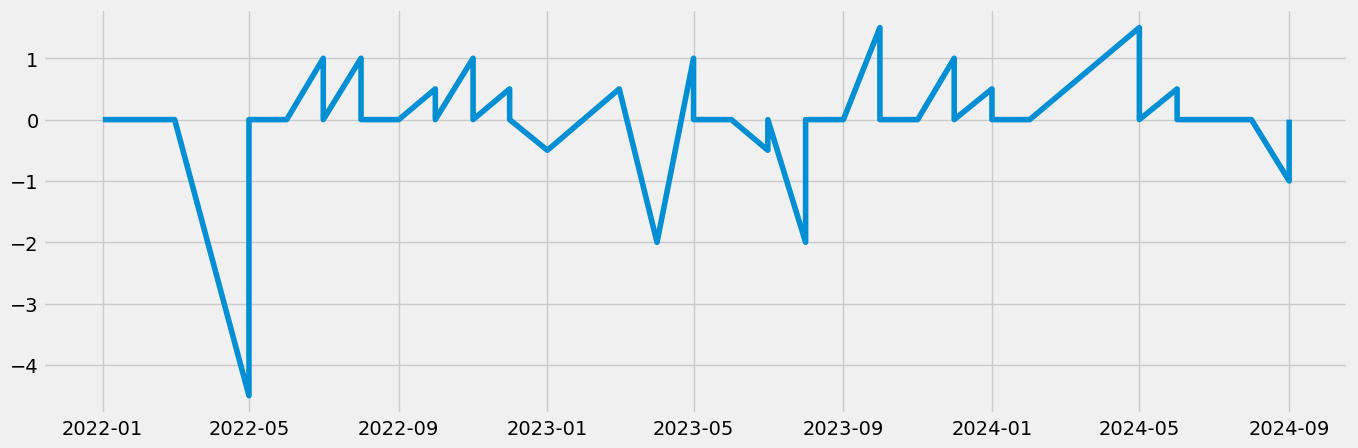

In [64]:
# Plot time series to see effect of the differencing
plt.figure(figsize=(15,5), dpi = 100)
plt.plot(df_diff)

In [66]:
# Run another 'dickey_fuller' test to 'df_diff' subset and check for stationary
dickey_fuller(df_diff)

Dickey-Fuller Stationarity Test:
Test Statistic                -7.586194e+00
p-value                        2.602889e-11
Number of Lags Used            0.000000e+00
Number of Observations Used    5.100000e+01
Critical Value (1%)           -3.565624e+00
Critical Value (5%)           -2.920142e+00
Critical Value (10%)          -2.598015e+00
dtype: float64


#### Null hypothesis: There is a unit root, meaning the data is not stationary.  Jumps in data suggest it is not stable over time.
#### Alternative hypothesis: There is no root unit and data is stable over time.

##### Analysis:
##### Is this data jumping around a lot in a way I cannot predict? Dickey-Fuller test helps me answer that question. 
##### T-Statistic = -7.59. This is less than Critical Values 1%, 5%, 10%. It is smaller (more negative) to -3.6, -2.9, and -2.6. Therefore data is stationary.
##### P-value = 2.60..e^-11. This makes the value so small and definetely less than 0.05, therefore we can reject null hypthesis. There is no root unit and is stationary.


#### 9. Check your data’s autocorrelations.

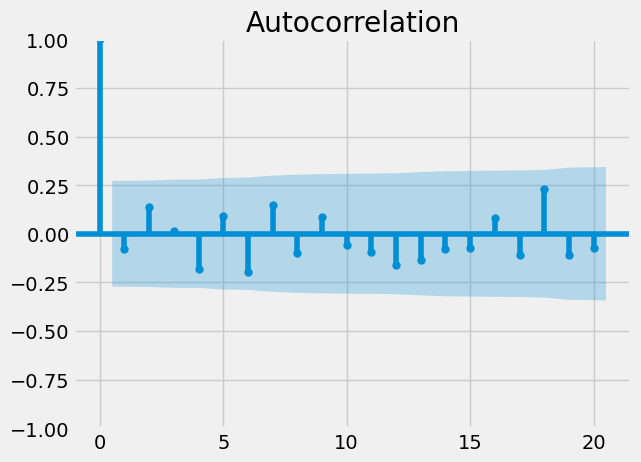

In [68]:
# Use statsmodel library's 'plot_acf' function to generate autocorrelation plot and 'plot_pacf' to generate partial autocorrelation plot
# ACF plot: helps me understand overall correlation structure in data and identify moving average terms
# PACF plot: helps me understand direct influence of past data and identify autoregressive terms
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

#'lags=20' help me see if there's a correlation between current data point and data points from up to 20 time periods in the past
plot_acf(df_diff, lags=20)
plt.show()